In [1]:
''' 
 Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering
 Date; 1. 8. 2020 - 2. 5. 2021
 Title: Artificial Intelligence_Project 2
 Professor: Seung-Hoon Na'''
            
import numpy as np
import random
import matplotlib.pyplot as plt

# 2.2 Stochastic Gradient Descent (SGD) Method with Minibatch

In [2]:
matrix= [[1,2,3],[2,2,3],[3,2,3],[4,2,3],[5,2,3],[6,2,3],[7,2,3],[8,2,3],[9,2,3]]
matrix=np.array(matrix)
y = [[1],[1],[1],[1],[1],[1],[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print('Loss:',loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN # 뒷계산을 위한 중간 계산
    '''
       3X1 과 3X1을 어떻게 곱해지는지 이해가 안됐지만 그 이유가 '*'와 'np.dot'의 차이를 알아야한다.
       어짜피 연쇄법칙으로 쭉 곱해가면서 가야하는데 위의 식을 곱하기 위해선 무조건 행렬이라고
       dot의 개념을 곱하면 안되고 똑같이 곱하되 numpy.array의 성질을 이용(같은 열과 같은 행이면
       위와 같이 곱해됨)한다.
       그래서 위에서는 '*'을 이용했지만 밑에서는 np.dot을 이용한다(즉, 곱해야 하는 행렬의 꼴을 봐가면서 
       '*' 혹은 'np.dot'을 이용하면 된다고 판단. 허나 만약 이도저도 안된다면....이 아니라 만약 그렇다면
       아마 이 계산과정 자체가 나오지 않았을 것) '''
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return print(loss_grad)

#loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')
def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
#batch(loss_grad)

print('=============')

minibatch_size = 4
number_minibatch= np.int(np.ceil(matrix.shape[0]/minibatch_size))

for i in range(1, number_minibatch+1):
    print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
    matrix1=matrix[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
    y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
    loss_gradient(matrix1,y1,weights)
    
    for key in weights.keys():
        print(key)
        print('before')
        print(weights[key])
        weights[key]=weights[key]- 0.001 * loss_grad[key]
        print('after')
        print(weights[key])
        print('\n')
    print('=================================')    

batch gradient descent

 0 ~ 3 열
N 
 [[6]
 [7]
 [8]
 [9]]
f 
 [[ 7]
 [ 8]
 [ 9]
 [10]]
Loss: 230
{'W': array([[160],
       [120],
       [180]]), 'B': array([60])}
W
before
[[1]
 [1]
 [1]]
after
[[0.84]
 [0.88]
 [0.82]]


B
before
[[1]]
after
[[0.94]]



 4 ~ 7 열
N 
 [[ 8.42]
 [ 9.26]
 [10.1 ]
 [10.94]]
f 
 [[ 9.36]
 [10.2 ]
 [11.04]
 [11.88]]
Loss: 373.70559999999995
{'W': array([[508.64],
       [153.92],
       [230.88]]), 'B': array([76.96])}
W
before
[[0.84]
 [0.88]
 [0.82]]
after
[[0.33136]
 [0.72608]
 [0.58912]]


B
before
[[0.94]]
after
[[0.86304]]



 8 ~ 11 열
N 
 [[6.20176]]
f 
 [[7.0648]]
Loss: 36.78179904
{'W': array([[109.1664],
       [ 24.2592],
       [ 36.3888]]), 'B': array([12.1296])}
W
before
[[0.33136]
 [0.72608]
 [0.58912]]
after
[[0.2221936]
 [0.7018208]
 [0.5527312]]


B
before
[[0.86304]]
after
[[0.8509104]]




# 2.3 early stopping 추가한 Algorithm of mini-batch SGD method

에폭의 수를 정해 다 돌기 전에 끝내는 것 => 끝내는 이유는 모델이 너무 training data에 치우쳐 져 있어서 test data나
real data에서 모델의 성능이 낮아지는 경향을 막기 위해서 <br>

1. 데이터를 training data, validation data, test data로 나눈다 <br>
2. 학습데이터만을 가지고 epoch이 한번 끝날 때마다 validation data로 시험을 해보는 것 <br>
3. validation accuracy가 증가하다가 계속 낮아지면 이때 학습을 멈추는 것(즉, validation accuracy가 최대일 때 멈춘다) <br>
4. 이후 이 모델(validation accuray가 젤 높은 모델)에 test data를 이용하여 확인 해 보는 것 <br>

# 2.4 Linear regression 구현

1. 시간 혹은 비용 문제로 전수 조사를 못한 상황에서 표본 조사를 해야 할 때, <br>
2. 기계학습을 할 때 데이터셋을 훈련용/검증용/테스트용으로 샘플링 할 때, <br>
3. 다양한 확률 분포로 부터 데이터를 무작위로 생성해서 시뮬레이션(simulation) 할 때 <br> 
   => 사용할 수 있는 무작위 난수 만들기(generating random numbers, random sampling)를 이용한다.<br>

※Python NumPy는 매우 빠르고 효율적으로 무작위 샘플을 만들 수 있는 numpy.random 모듈을 제공합니다. <br>
<br>
얼마나 신기하냐면<br>
random 모듈안에 이산형, 연속형 분포를 따르는 확률분포들이 있는데, 해당 분포에 맞는 parameter를 설정해주면 
파이썬이 알아서 해당 확률분포를 따르는 난수를 출력해주는 것이다.<br>

출처: https://rfriend.tistory.com/284 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

- 2.4.1 랜덤 데이터 생성기 구현: Gaussian 분포에 기반 N=1000,10000,1000000

test_Data_set
[[ -0.75453007  -0.62932287]
 [  7.42627036 -12.97321741]
 [  6.82548288 -10.96427286]]


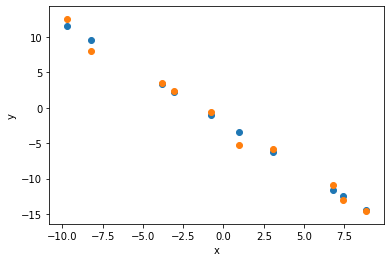

In [3]:
xlis = []
ylis = []
flis = [] 
wlis = []

def data_set(N,size):
    #size==특징의 개수
    R = 10
    W= np.random.uniform(-R,R,size=size)
    b= np.random.uniform(-R,R,size=size)
    b= random.choice(b)

    for i in range(N):
        x = np.random.uniform(-R,R,size=size)
        y = np.random.normal(W*x+b,1,size=size)
        xlis.append(x)
        ylis.append(y)
        flis.append(W*x+b)

    x=np.array(xlis)
    y=np.array(ylis)

    result = np.concatenate((x,y),axis=1)
    
    return result

result=data_set(10,1)
plt.scatter(xlis,flis)
plt.scatter(xlis,ylis)
plt.xlabel('x')
plt.ylabel('y')

train_idx=int(result.shape[0]*0.6)
dev_idx=int(result.shape[0]*0.1)
test_idx=int(result.shape[0]*0.3)

train_data_set=result[0:train_idx,:]
test_data_set=result[train_idx:train_idx+test_idx,:]
dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]

print('test_Data_set')
print(test_data_set)
test_data_set=np.random.permutation(test_data_set)

In [4]:
# 2.4.2 scikit sample: Diabetes

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# 2.4.3 Linear regression(Random data_set)

- prototype

In [5]:
#2.4.3 초기버전
matrix= [[1,2,3],[2,2,3],[3,2,3],[4,2,3],[5,2,3],[6,2,3],[7,2,3],[8,2,3],[9,2,3]]
matrix=np.array(matrix)
y = [[1],[1],[1],[1],[1],[1],[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print('Loss:',loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return print(loss_grad)

#loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')
def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
#batch(loss_grad)

minibatch_size = 3
number_minibatch= np.int(np.ceil(matrix.shape[0]/minibatch_size))
epoch_size=4

for j in range(1,epoch_size+1):
    print('*******',j,'번차 epoch*******')
    for i in range(1, number_minibatch+1):
        print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
        matrix1=matrix[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        loss_gradient(matrix1,y1,weights)

        for key in weights.keys():
            print(key)
            print('before')
            print(weights[key])
            weights[key]=weights[key]- 0.0001 * loss_grad[key]
            print('after')
            print(weights[key])
            print('\n')


batch gradient descent
******* 1 번차 epoch*******

 0 ~ 2 열
N 
 [[6]
 [7]
 [8]]
f 
 [[7]
 [8]
 [9]]
Loss: 149
{'W': array([[ 88],
       [ 84],
       [126]]), 'B': array([42])}
W
before
[[1]
 [1]
 [1]]
after
[[0.9912]
 [0.9916]
 [0.9874]]


B
before
[[1]]
after
[[0.9958]]



 3 ~ 5 열
N 
 [[ 8.9102]
 [ 9.9014]
 [10.8926]]
f 
 [[ 9.906 ]
 [10.8972]
 [11.8884]]
Loss: 295.8286584
{'W': array([[300.8808],
       [118.7664],
       [178.1496]]), 'B': array([59.3832])}
W
before
[[0.9912]
 [0.9916]
 [0.9874]]
after
[[0.96111192]
 [0.97972336]
 [0.96958504]]


B
before
[[0.9958]]
after
[[0.98986168]]



 6 ~ 8 열
N 
 [[11.59598528]
 [12.5570972 ]
 [13.51820912]]
f 
 [[12.58584696]
 [13.54695888]
 [14.5080708 ]]
Loss: 474.1260036547649
{'W': array([[606.09847392],
       [150.56350656],
       [225.84525984]]), 'B': array([75.28175328])}
W
before
[[0.96111192]
 [0.97972336]
 [0.96958504]]
after
[[0.90050207]
 [0.96466701]
 [0.94700051]]


B
before
[[0.98986168]]
after
[[0.9823335]]


******* 2 번차

# 2.4.3 완성

Train_data
************* 1 번차 epoch *************
Loss 0.9689401938930493
************* 2 번차 epoch *************
Loss 0.9685654731621512
************* 3 번차 epoch *************
Loss 0.9682920487893232
************* 4 번차 epoch *************
Loss 0.9681222431793726
************* 5 번차 epoch *************
Loss 0.9680685936744505
************* 6 번차 epoch *************
Loss 0.9679714942295727
************* 7 번차 epoch *************
Loss 0.9678958249531701
************* 8 번차 epoch *************
Loss 0.9678384748345579
************* 9 번차 epoch *************
Loss 0.9677654888726896
************* 10 번차 epoch *************
Loss 0.9676859024417606
************* 11 번차 epoch *************
Loss 0.9676210750366333
************* 12 번차 epoch *************
Loss 0.9675603487064173
************* 13 번차 epoch *************
Loss 0.9675091799574722
************* 14 번차 epoch *************
Loss 0.9674612349463612
************* 15 번차 epoch *************
Loss 0.9674016822582777
************* 16 번차 epoch ************

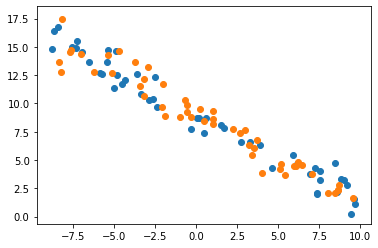

In [6]:
np.set_printoptions(precision=7)
xlis = []
ylis = []

R=10
size=1
weights={}
loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간
batch={}

W= np.random.uniform(-R,R,size=size)
b= np.random.uniform(-R,R,size=size)
b= random.choice(b)

for i in range(1000):
    x = np.random.uniform(-R,R,size=size)
    y = np.random.normal(W*x+b,1,size=size)
    xlis.append(x)
    ylis.append(y)
    flis.append(W*x+b)

x=np.array(xlis)
y=np.array(ylis)

weights['W']=W
weights['B']=b

result=np.concatenate((x,y),axis=1)

train_idx=int(result.shape[0]*0.85)
dev_idx=int(result.shape[0]*0.05)
test_idx=int(result.shape[0]*0.1)

train_data_set=result[0:train_idx,:]
test_data_set=result[train_idx:train_idx+test_idx,:]
dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]

def linear_regression(data, idx, minibatch_size, epoch_size):
    data_list=[]
    X_batch= data[:,0]
    y_batch= data[:,1]
    X_batch=np.reshape(X_batch,(idx,size))
    y_batch=np.reshape(y_batch,(idx,size))

    number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    
    for j in range(1,epoch_size+1):
        print('*************',j,'번차 epoch *************')
        data=np.random.permutation(data)
        X_batch= data[:,0]
        y_batch= data[:,1]
        X_batch=np.reshape(X_batch,(idx,size))
        y_batch=np.reshape(y_batch,(idx,size))
        
        number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    #    assert X_batch.shape[0] == y_batch.shape[0]
    #    assert X_batch.shape[1] == weights['W'].shape[0]
        
        for i in range(1, number_minibatch+1):
            X_batch_temp=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y_temp=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            
            N=weights['W']*X_batch_temp
            f= N+weights['B']
            loss=np.mean(np.power(y_temp-f,2))
            
            forward_info['X']= X_batch_temp
            forward_info['N']= N       # 
            forward_info['f']= f       # 예측값
            forward_info['y']= y_temp # 실제값

            # 전체코드로 본 도함수 계산과정
            batch_size=forward_info['X'].shape[0]
            dJdf=-2*(forward_info['y']-forward_info['f'])
            dfdN=np.ones_like(forward_info['N']) 
            dfdB=np.ones_like(forward_info['N'])
            dJdN=dJdf*dfdN 
            dNdW=np.transpose(forward_info['X'],(1,0))

            dJdW=np.dot(dNdW, dJdN)
            dLdB=(dJdf*dfdB).sum(axis=0)

            loss_grad['W']=dJdW
            loss_grad['B']=dLdB

            for key in weights.keys():
                weights[key]=weights[key]- 0.00001 * loss_grad[key]
        
        N=weights['W']*X_batch
        f= N+weights['B']
        loss=np.mean(np.power(y_batch-f,2))
        print('Loss',loss)
      
        #print('=================================')
        
        data_list.append(loss)
        
    X_batch = list(X_batch)
    
    #epoch에 따른 loss 출력도 가능
    return plt.scatter(X_batch_temp, y_temp, label = 'name')

print('Train_data')
train_ = linear_regression(train_data_set,train_idx,50,30)

#print('\ndev_data')
#dev_ = linear_regression(dev_data_set,dev_idx,20,30)

print('\nTest_data')
Test_ = linear_regression(test_data_set,test_idx,50,30)
